In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('rslp')
nltk.download('stopwords')


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# Redefinição dos pipelines apenas com vetorização e o classificador
pipelines = {
    'Logistic Regression': Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    'SVM': Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', SVC(kernel='linear', random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
    ])
}

In [ ]:
# Carregamento e preparação inicial do dataset
reviews_df = pd.read_csv('/content/olist_order_reviews_dataset.csv')
reviews_df.drop_duplicates(subset='review_id', inplace=True)
reviews_df.dropna(subset=['review_comment_message'], inplace=True)

# Classificação dos sentimentos baseada em 'review_score'
reviews_df['sentiment'] = reviews_df['review_score'].apply(lambda x: 'positive' if x > 3 else 'negative')
X = reviews_df['review_comment_message']
y = reviews_df['sentiment']

In [ ]:
# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model: Logistic Regression


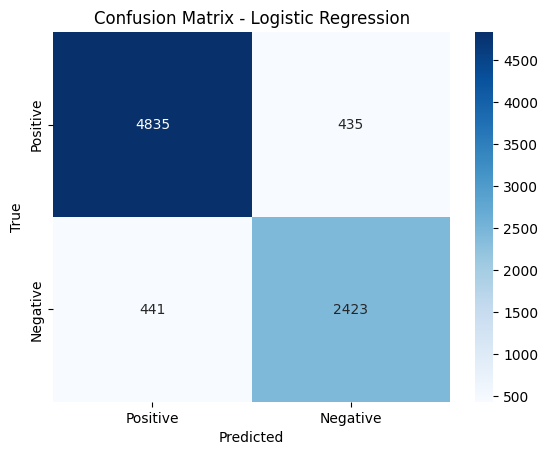

Model: SVM


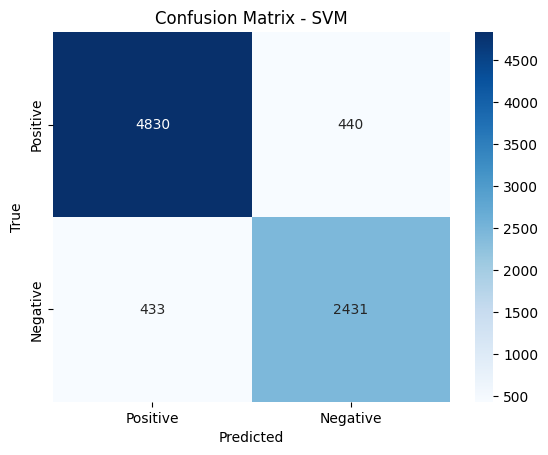

Model: Random Forest


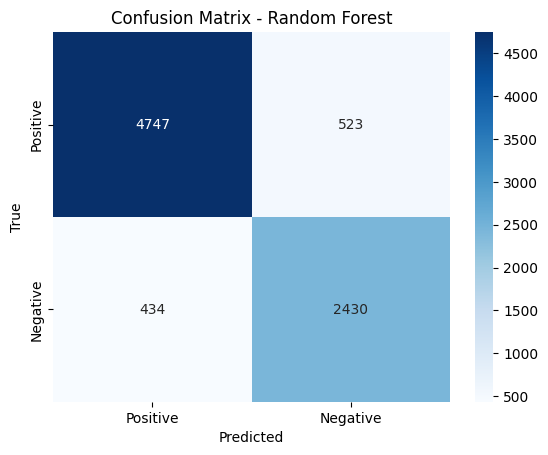

In [ ]:
for name, pipeline in pipelines.items():
    print(f"Model: {name}")

    # Treinamento do modelo
    pipeline.fit(X_train, y_train)

    # Previsões
    y_pred = pipeline.predict(X_test)

    # Geração da Matriz de Confusão
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])

    # Visualização da Matriz de Confusão
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ApplyRegex(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return [re.sub(r'[^a-zA-Z0-9\s]', '', doc.lower()) for doc in X]

class StopWordsRemoval(BaseEstimator, TransformerMixin):
    def __init__(self, stopwords):
        self.stopwords = stopwords
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return [' '.join([word for word in doc.split() if word not in self.stopwords]) for doc in X]

class StemmingProcess(BaseEstimator, TransformerMixin):
    def __init__(self, stemmer):
        self.stemmer = stemmer
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return [' '.join([self.stemmer.stem(word) for word in doc.split()]) for doc in X]


In [ ]:
# Carregamento e preparação inicial do dataset
reviews_df = pd.read_csv('/content/olist_order_reviews_dataset.csv')
reviews_df.drop_duplicates(subset='review_id', inplace=True)
reviews_df.dropna(subset=['review_comment_message'], inplace=True)

# Classificação dos sentimentos baseada em 'review_score'
reviews_df['sentiment'] = reviews_df['review_score'].apply(lambda x: 'positive' if x > 3 else 'negative')
X = reviews_df['review_comment_message']
y = reviews_df['sentiment']


In [ ]:
# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Definição de Pipelines para modelos
pipelines = {
    'Logistic Regression': Pipeline([
        ('regex', ApplyRegex()),
        ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
        ('stemming', StemmingProcess(RSLPStemmer())),
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    'SVM': Pipeline([
        ('regex', ApplyRegex()),
        ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
        ('stemming', StemmingProcess(RSLPStemmer())),
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', SVC(kernel='linear', random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('regex', ApplyRegex()),
        ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
        ('stemming', StemmingProcess(RSLPStemmer())),
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
    ])
}


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.84      0.83      0.84      2864
    positive       0.91      0.91      0.91      5270

    accuracy                           0.88      8134
   macro avg       0.87      0.87      0.87      8134
weighted avg       0.88      0.88      0.88      8134

Percentual de reviews positivos: 64.94%
Percentual de reviews negativos: 0.35%


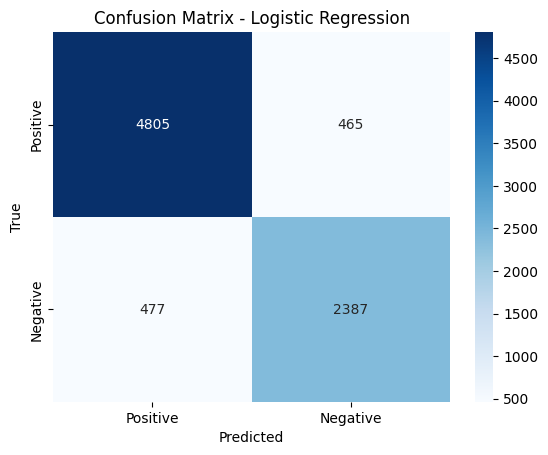

Model: SVM
              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      2864
    positive       0.91      0.91      0.91      5270

    accuracy                           0.88      8134
   macro avg       0.87      0.87      0.87      8134
weighted avg       0.88      0.88      0.88      8134

Percentual de reviews positivos: 64.94%
Percentual de reviews negativos: 0.35%


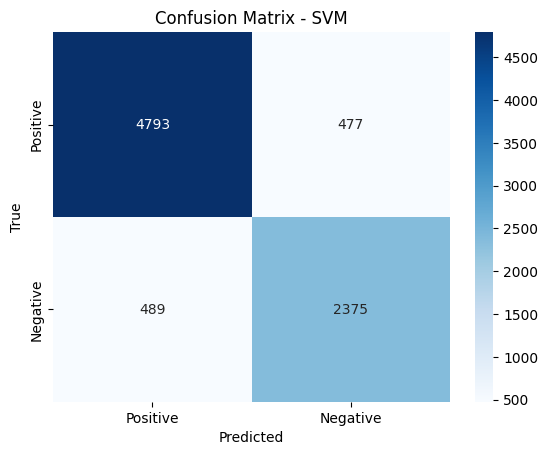

Model: Random Forest
              precision    recall  f1-score   support

    negative       0.82      0.83      0.83      2864
    positive       0.91      0.90      0.90      5270

    accuracy                           0.88      8134
   macro avg       0.86      0.87      0.87      8134
weighted avg       0.88      0.88      0.88      8134

Percentual de reviews positivos: 64.65%
Percentual de reviews negativos: 0.35%


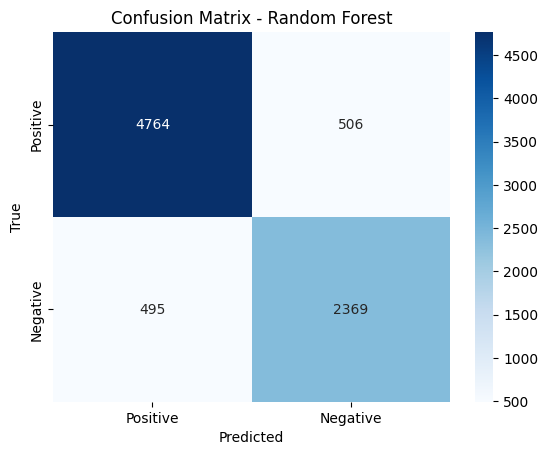

In [ ]:
# Loop sobre cada modelo no dicionário
for name, pipeline in pipelines.items():
    print(f"Model: {name}")

    # Treinamento do modelo e previsões
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Relatório de classificação
    print(classification_report(y_test, y_pred))

    # Cálculo dos percentuais de reviews positivos e negativos
    positive_percent = (y_pred[y_pred == 'positive'].shape[0] / len(y_pred)) * 100
    negative_percent = (y_pred[y_pred == 'negative'].shape[0] / len(y_pred))

    print(f"Percentual de reviews positivos: {positive_percent:.2f}%")
    print(f"Percentual de reviews negativos: {negative_percent:.2f}%")

    # Matriz de Confusão
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


<ipython-input-113-dd30a8a4751f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='customer_state', y='count', data=customers_per_state, palette=palette)  # Usando mapa de cores


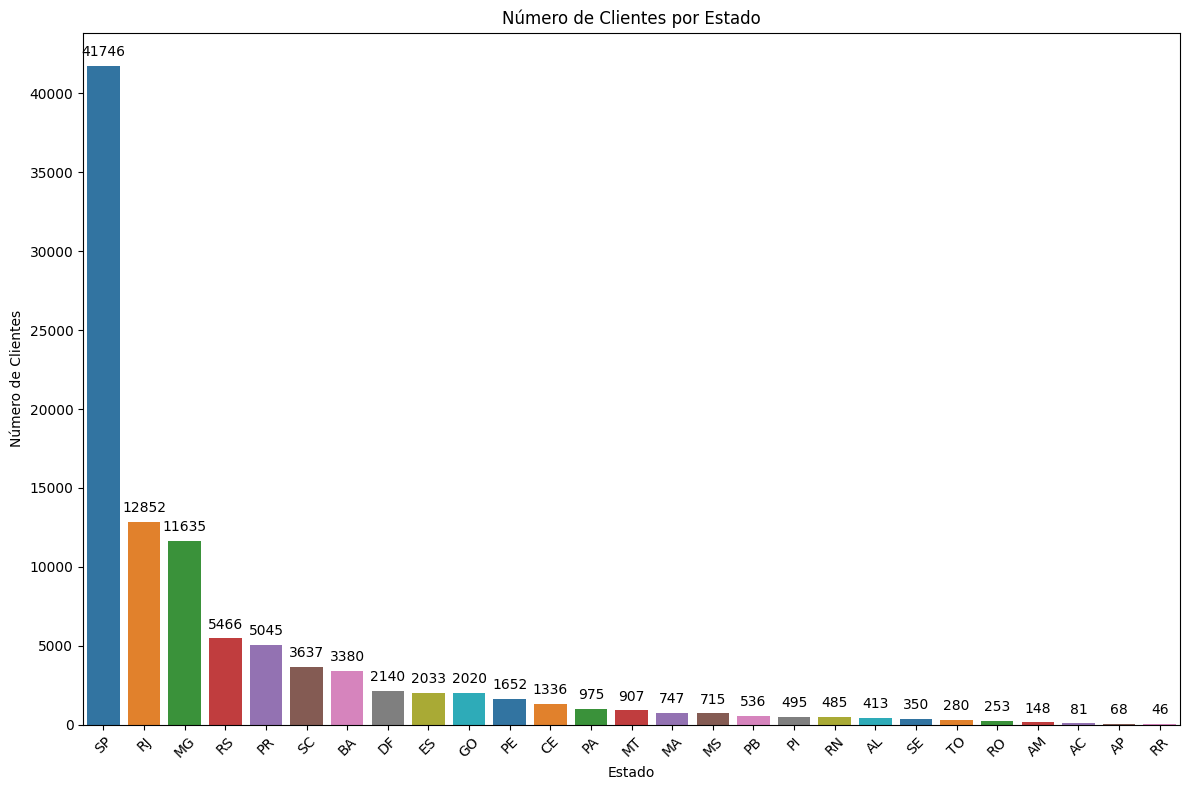

In [ ]:
# Carregando dados de clientes
customers_df = pd.read_csv('/content/olist_customers_dataset.csv')
orders_df = pd.read_csv('/content/olist_orders_dataset.csv')

# Unindo os DataFrames para associar cada cliente ao seu pedido
merged_df = pd.merge(orders_df, customers_df[['customer_id', 'customer_state']], on='customer_id')

# Contando o número de clientes por estado
customers_per_state = merged_df.groupby('customer_state').size().reset_index(name='count').sort_values(by='count', ascending=False)

# Criando um mapa de cores único para cada estado baseado no índice
unique_states = customers_per_state['customer_state'].unique()
palette = {state: color for state, color in zip(unique_states, sns.color_palette(n_colors=len(unique_states)))}

# Visualização do número de clientes por estado
plt.figure(figsize=(12, 8))
bar = sns.barplot(x='customer_state', y='count', data=customers_per_state, palette=palette)  # Usando mapa de cores
plt.title('Número de Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)

# Adicionando anotações (número de clientes) em cada barra
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.tight_layout()
plt.show()


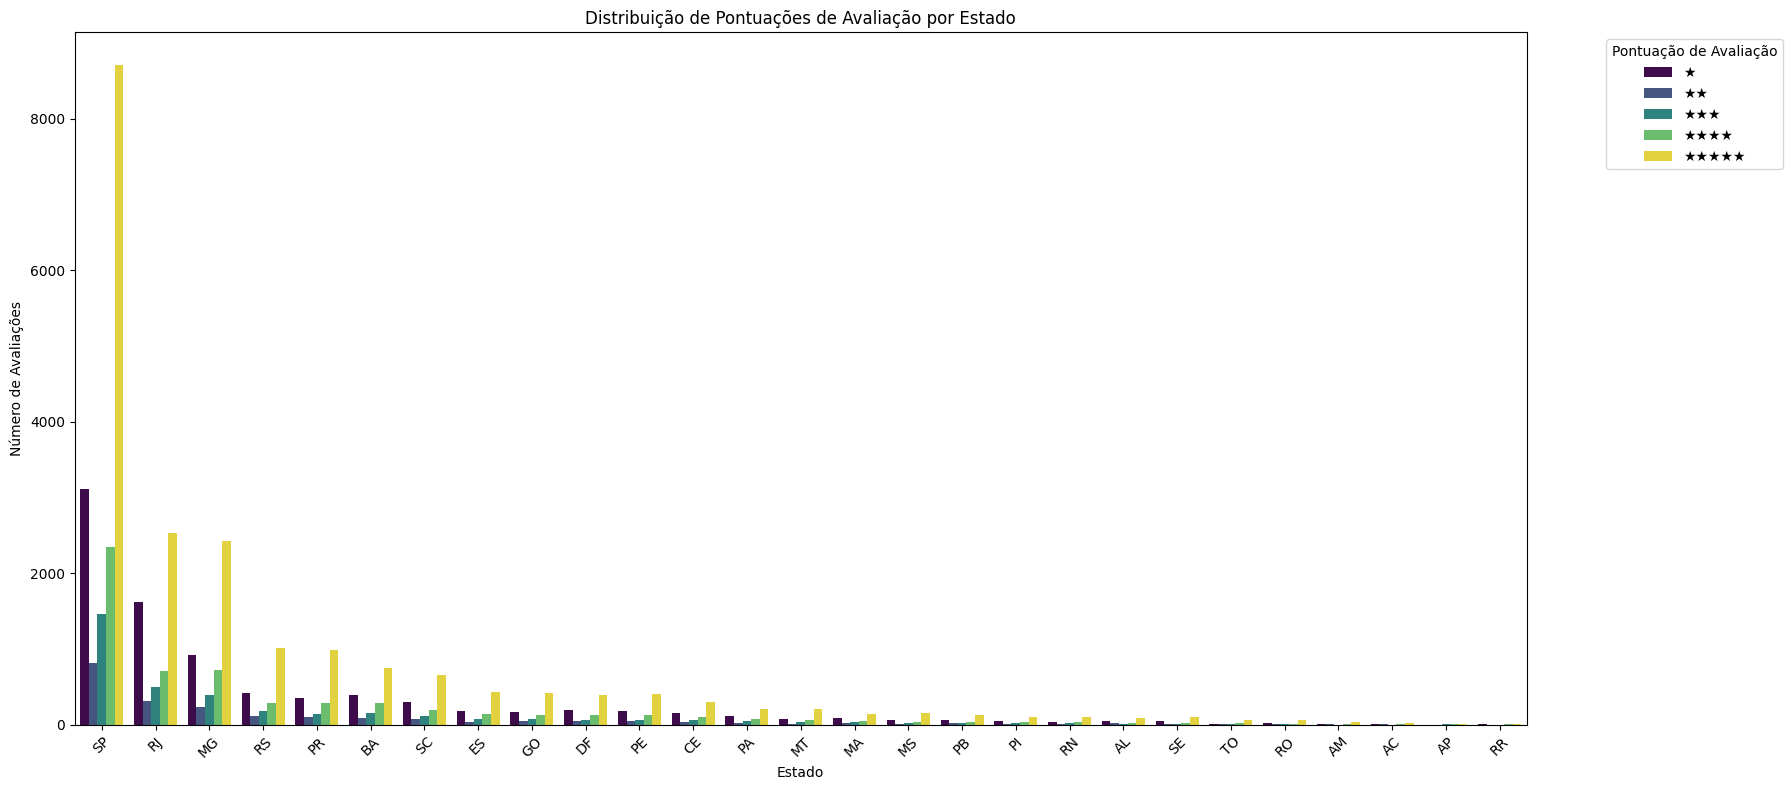

In [ ]:
# Preparação de dados para visualização
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=review_scores_by_state, x='customer_state', hue='review_score', palette='viridis',
                   order=review_scores_by_state['customer_state'].value_counts().index)

plt.title('Distribuição de Pontuações de Avaliação por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=45)

# Modificando as legendas para usar estrelas como texto
# Vamos usar o caractere de estrela '★' para representar cada avaliação
stars = ['★', '★★', '★★★', '★★★★', '★★★★★']
# Criando uma nova legenda com estrelas
legend_labels = [f'{star}' for star in stars]
plt.legend(title='Pontuação de Avaliação', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
def remove_noise(X, y):
    cleaned_X = []
    cleaned_y = []
    for text, label in zip(X, y):
        if len(text.split()) > 3:  # Remover revisões com menos de 3 palavras
            cleaned_X.append(text)
            cleaned_y.append(label)
    return cleaned_X, cleaned_y


In [ ]:
X_train_cleaned, y_train_cleaned = remove_noise(X_train, y_train)
X_test_cleaned, y_test_cleaned = remove_noise(X_test, y_test)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

# Supondo que ApplyRegex, StopWordsRemoval, StemmingProcess sejam definidos em outro lugar
# pipelines permanecem essencialmente os mesmos, mas sem a etapa 'noise_removal'


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      2654
    positive       0.91      0.89      0.90      3968

    accuracy                           0.88      6622
   macro avg       0.88      0.88      0.88      6622
weighted avg       0.88      0.88      0.88      6622

Percentual de reviews positivos: 58.23%
Percentual de reviews negativos: 0.42%


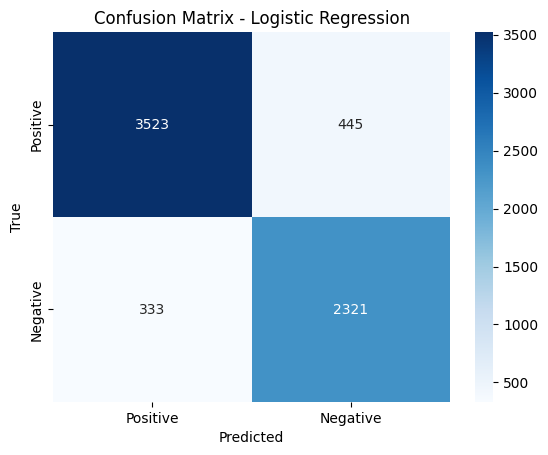

Model: SVM
              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      2654
    positive       0.91      0.88      0.90      3968

    accuracy                           0.88      6622
   macro avg       0.87      0.88      0.88      6622
weighted avg       0.88      0.88      0.88      6622

Percentual de reviews positivos: 58.08%
Percentual de reviews negativos: 0.42%


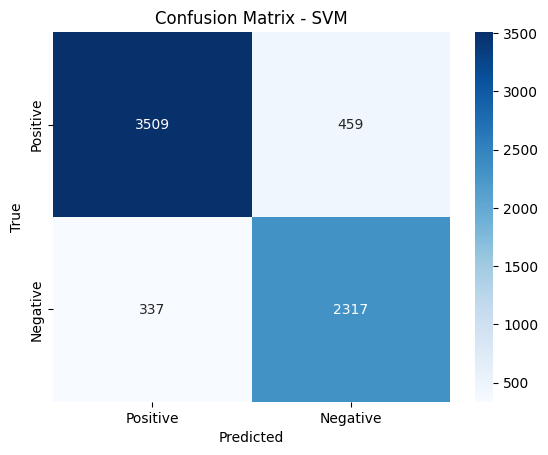

Model: Random Forest
              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      2654
    positive       0.90      0.89      0.90      3968

    accuracy                           0.88      6622
   macro avg       0.87      0.87      0.87      6622
weighted avg       0.88      0.88      0.88      6622

Percentual de reviews positivos: 59.30%
Percentual de reviews negativos: 0.41%


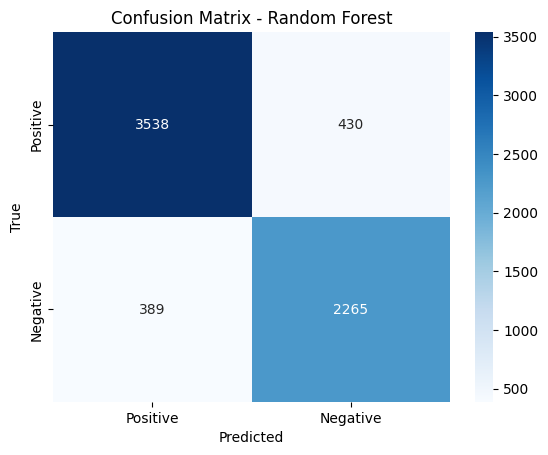

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for name, pipeline in pipelines.items():
    print(f"Model: {name}")

    # Treinamento do modelo e previsões usando os conjuntos de dados limpos
    pipeline.fit(X_train_cleaned, y_train_cleaned)
    y_pred = pipeline.predict(X_test_cleaned)

    # Relatório de classificação
    print(classification_report(y_test_cleaned, y_pred))

    # Cálculo dos percentuais de reviews positivos e negativos
    # Aqui, assumimos que y_test_cleaned é um numpy array para facilitar a filtragem
    # Se não for, considere converter ou ajustar a lógica conforme necessário
    positive_reviews = np.sum((y_pred == 'positive') & (y_test_cleaned == 'positive'))
    negative_reviews = np.sum((y_pred == 'negative') & (y_test_cleaned == 'negative'))
    total_reviews = len(y_test_cleaned)

    # Cálculo dos percentuais de reviews positivos e negativos
    positive_percent = (y_pred[y_pred == 'positive'].shape[0] / len(y_pred)) * 100
    negative_percent = (y_pred[y_pred == 'negative'].shape[0] / len(y_pred))


    print(f"Percentual de reviews positivos: {positive_percent:.2f}%")
    print(f"Percentual de reviews negativos: {negative_percent:.2f}%")

    # Matriz de Confusão
    conf_matrix = confusion_matrix(y_test_cleaned, y_pred, labels=["positive", "negative"])
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
